# Представление числовых данных в памяти компьютера
Компьютеры, которыми мы пользуемся, построены на основе *цифровой логики*.
В этой системе информация представляет из себя простейшие цифровые сигналы `0` и `1`.
Объём информации такой элементарной ячейки называется *битом*.

Любая информация, которую мы хотим хранить или обрабатывать при помощи компьютера, должна быть представлена (*закодирована*) в *двоичном виде*.

Минимальный удобный для хранения в оперативной памяти компьютера квант информации составляет 8 бит. Такое количество информации получило свое название - *байт*.
Если у 1 бита всего 2 состояния, то, исходя из комбинаторики, у байта 256 состояний. Этого маловато, чтобы сохранить все возможные числа (тем более, что в математике их бесконечное число), но для начала зададимся хотя бы этим: как назначить коды числам от 0 до 255.

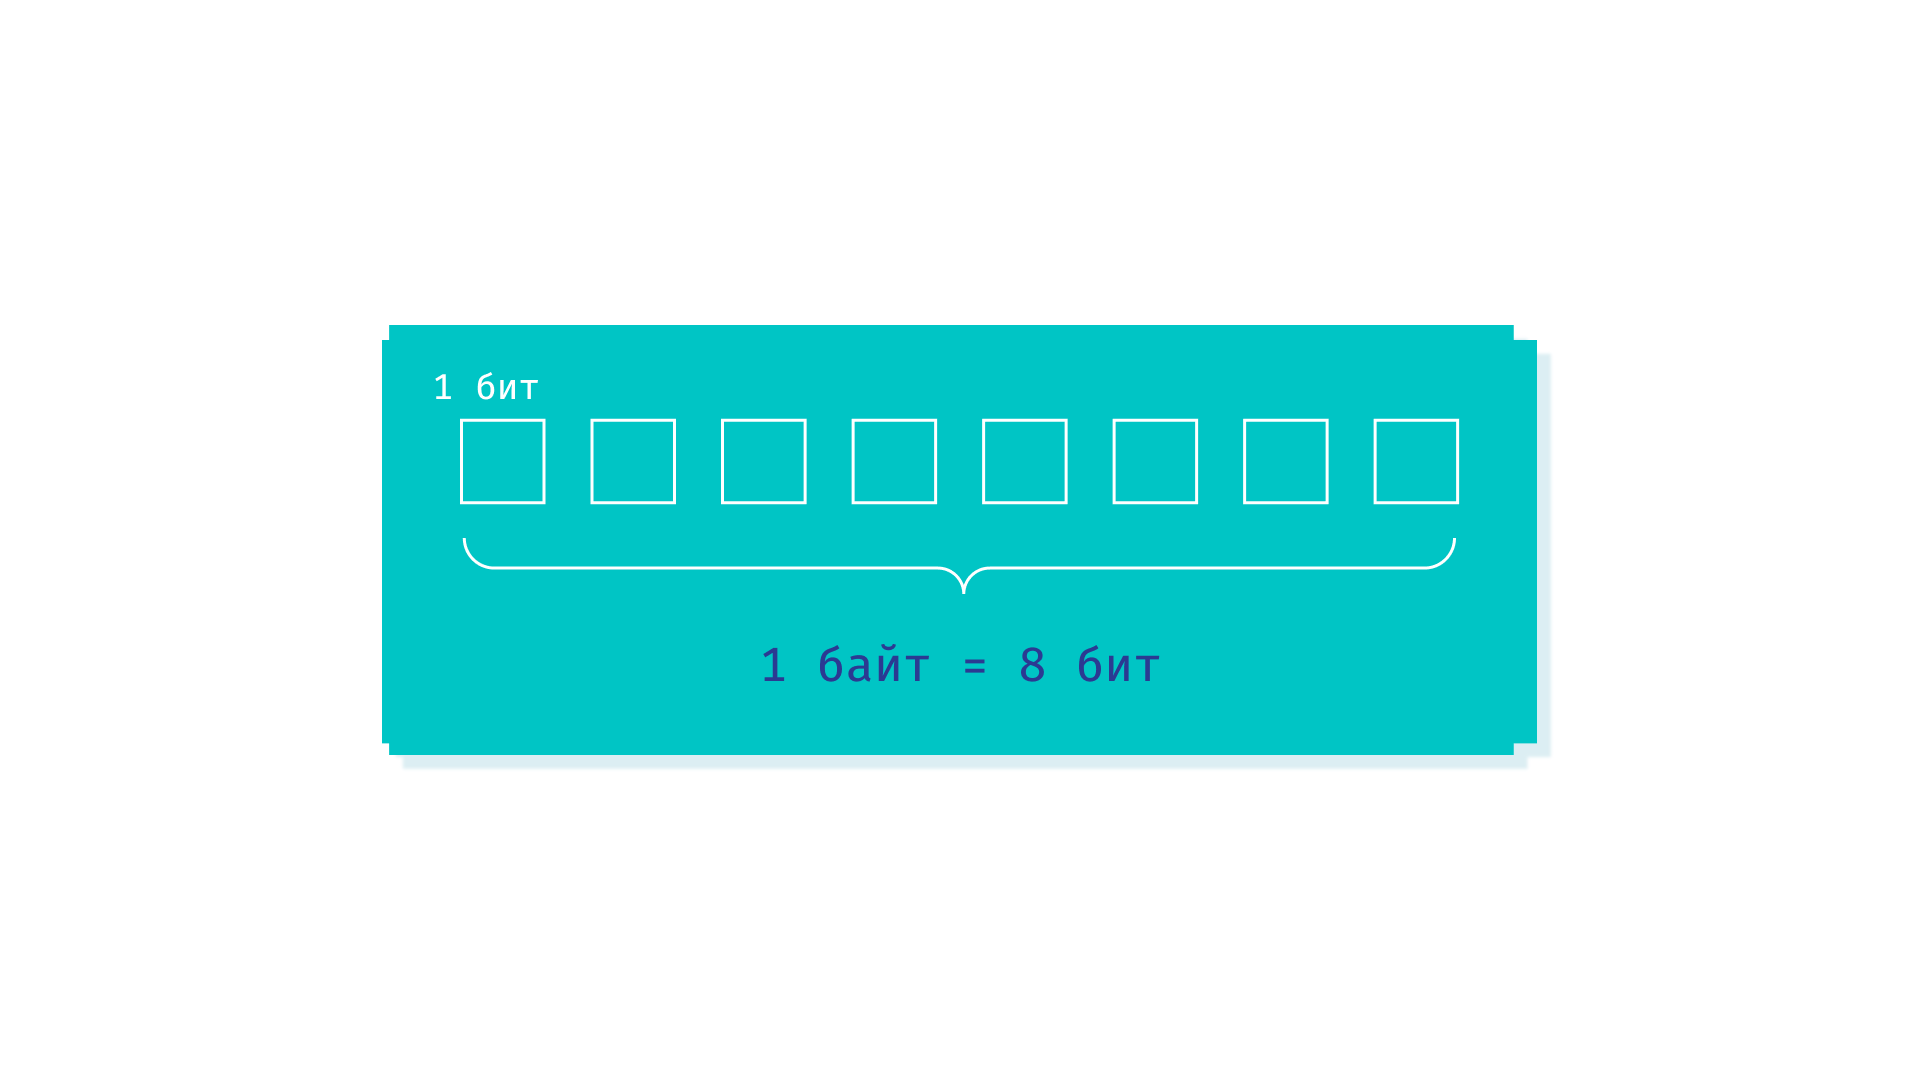

## Двоичная система счисления
Самый простой и естественный путь — воспользоваться двоичной системой счисления с лидирующими *незначащими нулями*:
```
00000000 = 0
00000001 = 1
00000010 = 2
00000011 = 3
00000100 = 4
00000101 = 5
00000110 = 6
00000111 = 7
...      = ...
11111111 = 255
```

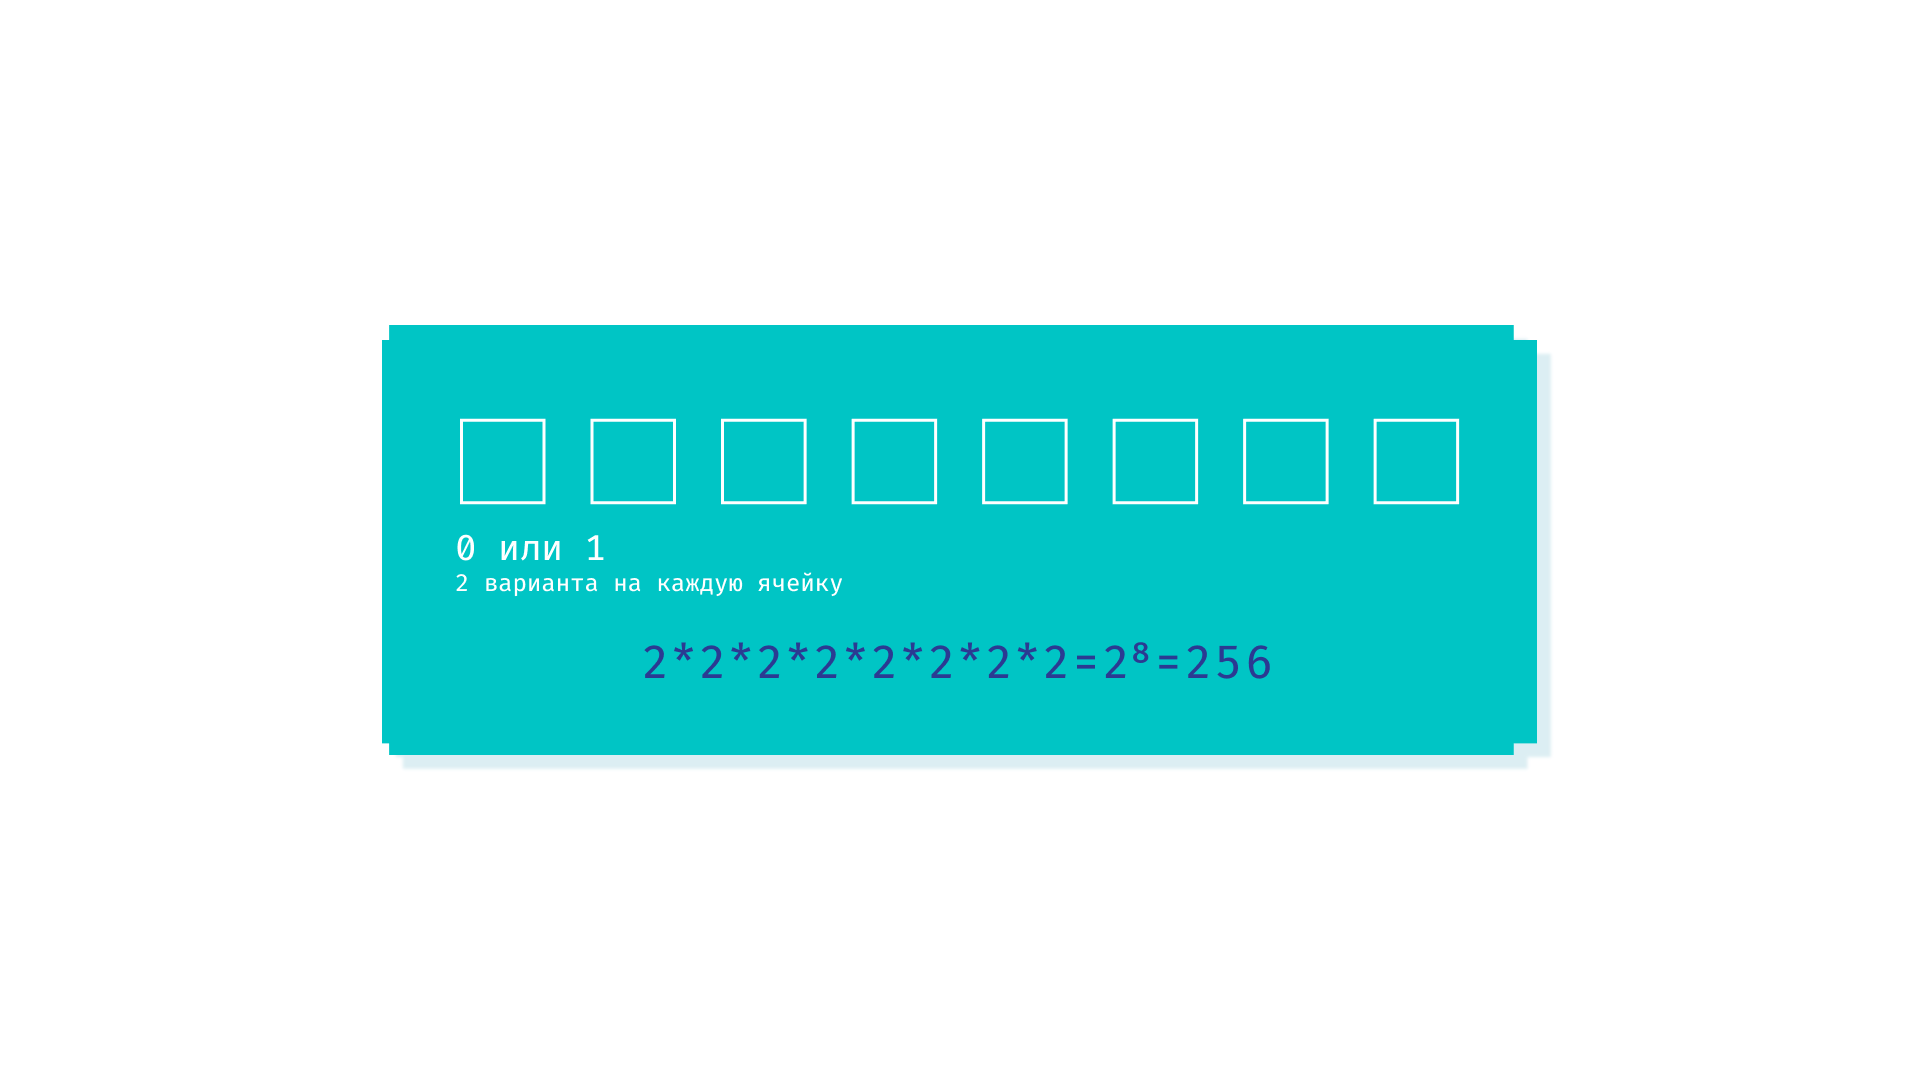

## Типы числовых данных в памяти ПК
Если при вычислениях мы превысим 255, у нас получится *переполнение* ячейки хранения, а результат будет неверным (ну или хотя бы не тем, который вы ожидаете).

Поэтому программисты *в каждой конкретной ситуации* выбирают такое количество байт у ячейки, чтобы его хватало для всего набора чисел, которые только могут получиться при вычислениях.

Когда требуется кроме модуля сохранять ещё и знак числа (допускать отрицательные числа), приходится "пожертвовать" на это половину положительного диапазона чисел. Например, для 1 байта диапазон кодирования будет от -128 до +127 (при этом ноль — получается условно "положительное" число).

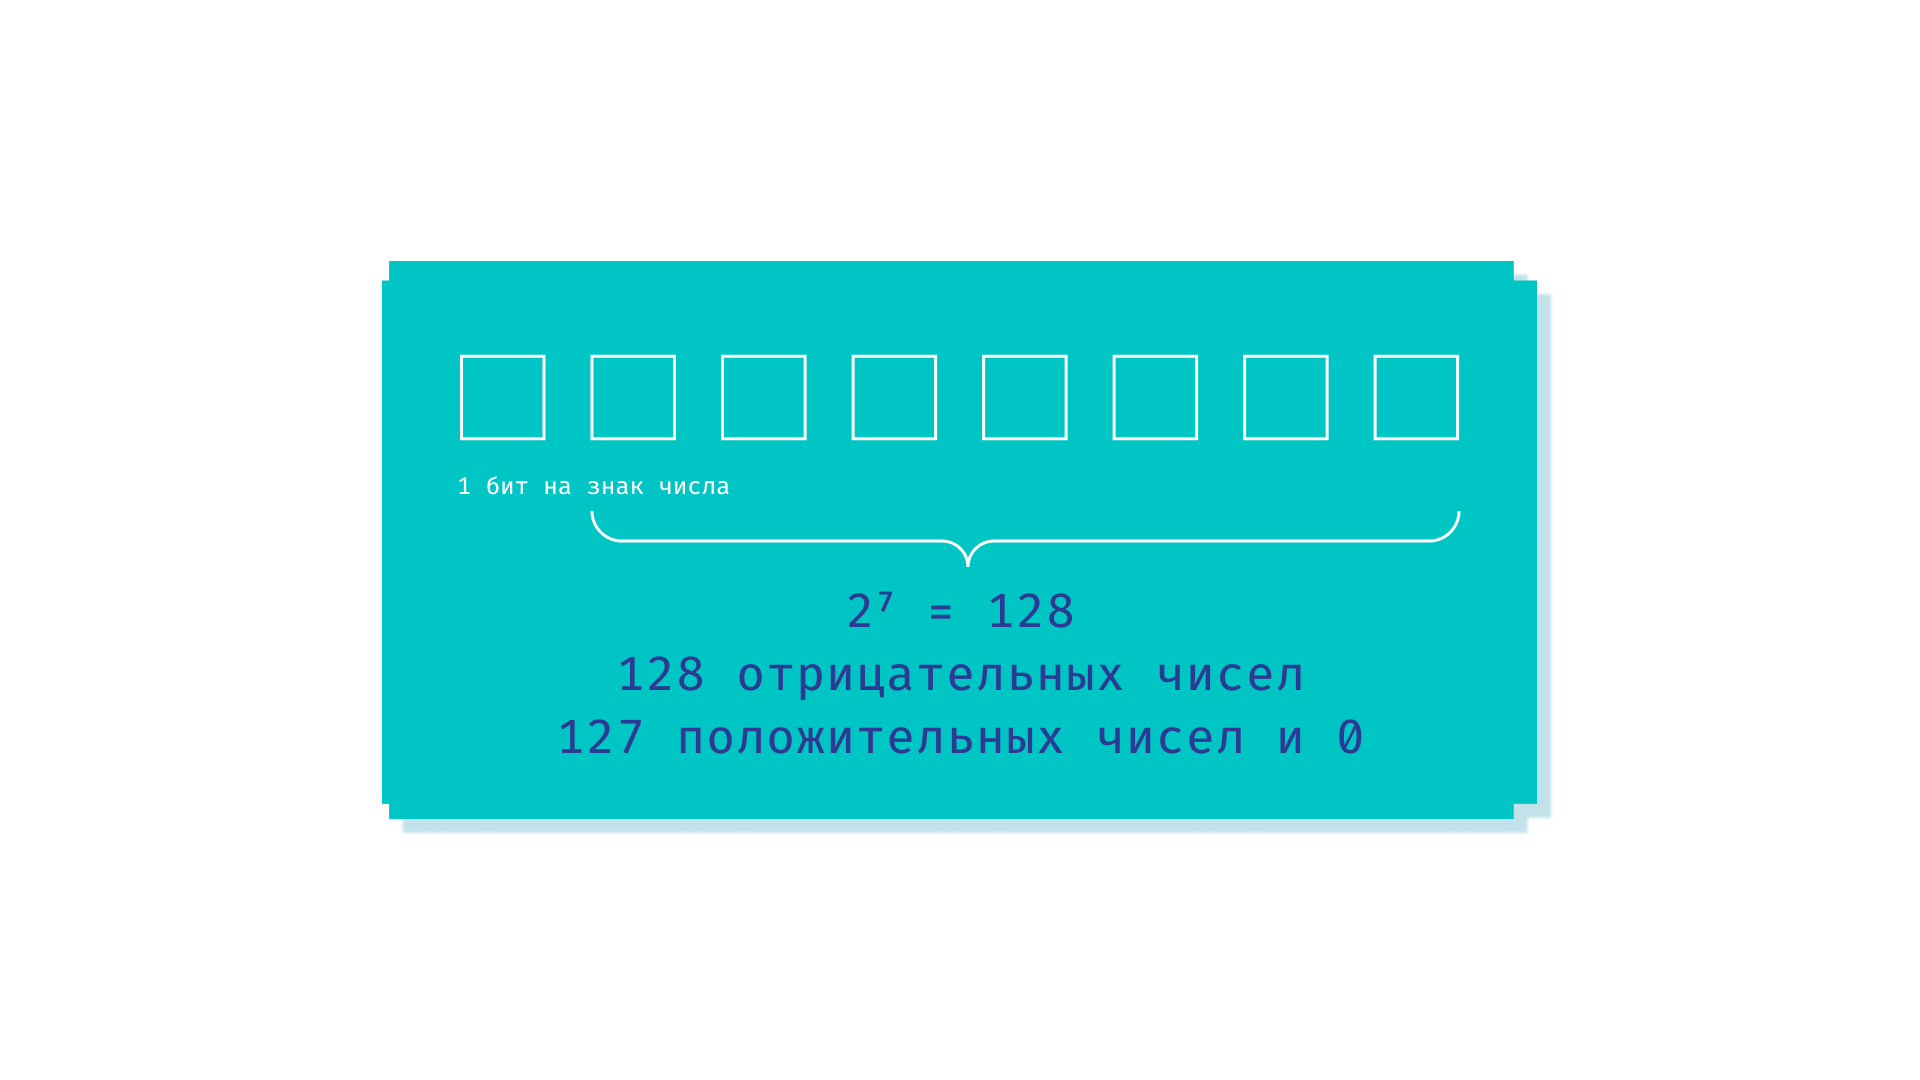

В Python *для целых чисел* реализована **длинная арифметика**, что позволяет создавать очень большие числа. Важно только понимать, что *даже один такой объект числа может занимать очень много оперативной памяти компьютера*. Зато можно не волноваться про переполнения. Этот тип объекта называется `int`.

In [ ]:
2 ** 10

1024

In [ ]:
2 ** 100

1267650600228229401496703205376

In [ ]:
2 ** 1000

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

Для того, чтобы создать целое число `int` в Python, нужно просто записать цифрами его литерал, либо запустить *конструктор int*, который умеет делать число из строки:

In [ ]:
x = 12345
print(x, type(x))

12345 <class 'int'>


In [ ]:
x = int("12345")
print(x, type(x))

12345 <class 'int'>


Это удобно, когда число попало к нам в программу из текстового файла или с клавиатуры:

In [ ]:
line = input("Введите число:")
print("Тип line: ", type(line))
x = int(line)
print("Тип x: ", type(x))
print("x: ", x)

Введите число:12345
Тип line:  <class 'str'>
Тип x:  <class 'int'>
x:  12345


In [ ]:
x = int(input("Введите число:"))  # здесь запуски функций происходят последовательно: вначале input(), а затем её значение передаётся как параметр конструктору int
print(x)

Введите число:12345
12345


## Дробные числа

Когда нужно хранить дробные числа, возникает много вопросов. Дело в том, что даже натуральных чисел бесконечно много, а дробных чисел много *континуально*. Их так много, что их нельзя пересчитать даже за бесконечное время. Они бесконечно плотно покрывают окрестность любой точки числовой прямой.

Главных вопроса два:
1. как мы вообще сможем записать значение числа;
2. сможем ли мы это закодировать конечным количеством бит.

Но в любом случае бесконечное многообразие сменится хоть и очень большим, но дискретным набором чисел.

Древние греки знали только рациональные числа — *обыкновенные дроби*. Их можно представить как целый числитель и натуральный знаменатель. В Python для работы с ними есть библиотека fractions и класс объектов `Fraction`:

In [ ]:
from fractions import Fraction
a = Fraction(2, 3)
b = Fraction(1, 6)
print(a, '+', b, '=', a + b)
print(a, '-', b, '=', a - b)
print(a, '*', b, '=', a * b)
print(a, '/', b, '=', a / b, "<--- для математической красоты не хватает скобочек")

2/3 + 1/6 = 5/6
2/3 - 1/6 = 1/2
2/3 * 1/6 = 1/9
2/3 / 1/6 = 4 <--- для математической красоты не хватает скобочек


Точность хранения числителя и знаменателя теоретически не ограничена, т.к. они имеют длинный тип `int`, но на практике всё опять упирается в память компьютера.

Из школы мы также знаем *десятичные дроби*. Они представлены библиотекой decimal и классом объектов `Decimal`:

In [ ]:
from decimal import Decimal
a = Decimal('12.3456789012345678901234567890123456')
b = Decimal('0.98765432109876543210987654321098765')
print(a, '+', b, '=', a + b)
print(a, '-', b, '=', a - b)
print(a, '*', b, '=', a * b)
print(a, '/', b, '=', a / b)

12.3456789012345678901234567890123456 + 0.98765432109876543210987654321098765 = 13.33333322233333332223333333
12.3456789012345678901234567890123456 - 0.98765432109876543210987654321098765 = 11.35802458013580245801358025
12.3456789012345678901234567890123456 * 0.98765432109876543210987654321098765 = 12.19326311370217952261850327
12.3456789012345678901234567890123456 / 0.98765432109876543210987654321098765 = 12.49999988609375000142382812


Данные объекты активно используются в банковских расчётах, поскольку хорошо воспроизводят вычисления, которые делают люди вручную с десятичными дробями.

Однако для научных вычислений чаще используются *дроби с плавающей точкой* (по-русски — запятой), то есть с мантиссой и экспонентой. По внутреннему хранению они двоичные, но при вводе-выводе для удобства всегда представлены в десятичном виде. Для их использования не нужно подключать библиотек, а представлены они классом объектов `float`.

Числа `float` появляются автоматически, когда целые числа `int` делят друг на друга или возводят в отрицательную степень:

In [ ]:
x = 2 ** -1
print(x, type(x))

0.5 <class 'float'>


In [ ]:
x = 2 / 5
print(x, type(x))

0.4 <class 'float'>


Даже если числа делятся друг на друга нацело, результат будет всё равно `float`:

In [ ]:
x = 10 / 5
print(x, type(x))

2.0 <class 'float'>


Создать такое число можно также из строки при помощи конструктора:

In [ ]:
x = float(input("Введите число с плавающей точкой: "))
print(x, type(x))

Введите число с плавающей точкой: 12.345
12.345 <class 'float'>


# «Переменные» в Python
В приказательном, *императивном программировании* (однокоренные слова — император, заклинание "империо") очень важная роль отводится **переменным**.
Это ячейки, значение которых может меняться. В Python числа, строки и некоторые другие объекты запрещают менять значение оъекта, а значит *переменных в классическом смысле в Python нет* (ну... в глубинах библиотек, например, в `array` или Numpy, переменные ячейки всё-таки есть). Однако имя может *начать обозначать ссылку на другой объект*. Вкупе с неизменяемыми объектами это выглядит как классическое присваивание:

In [ ]:
x = 2
print(x)
x = 5
print(x)

2
5


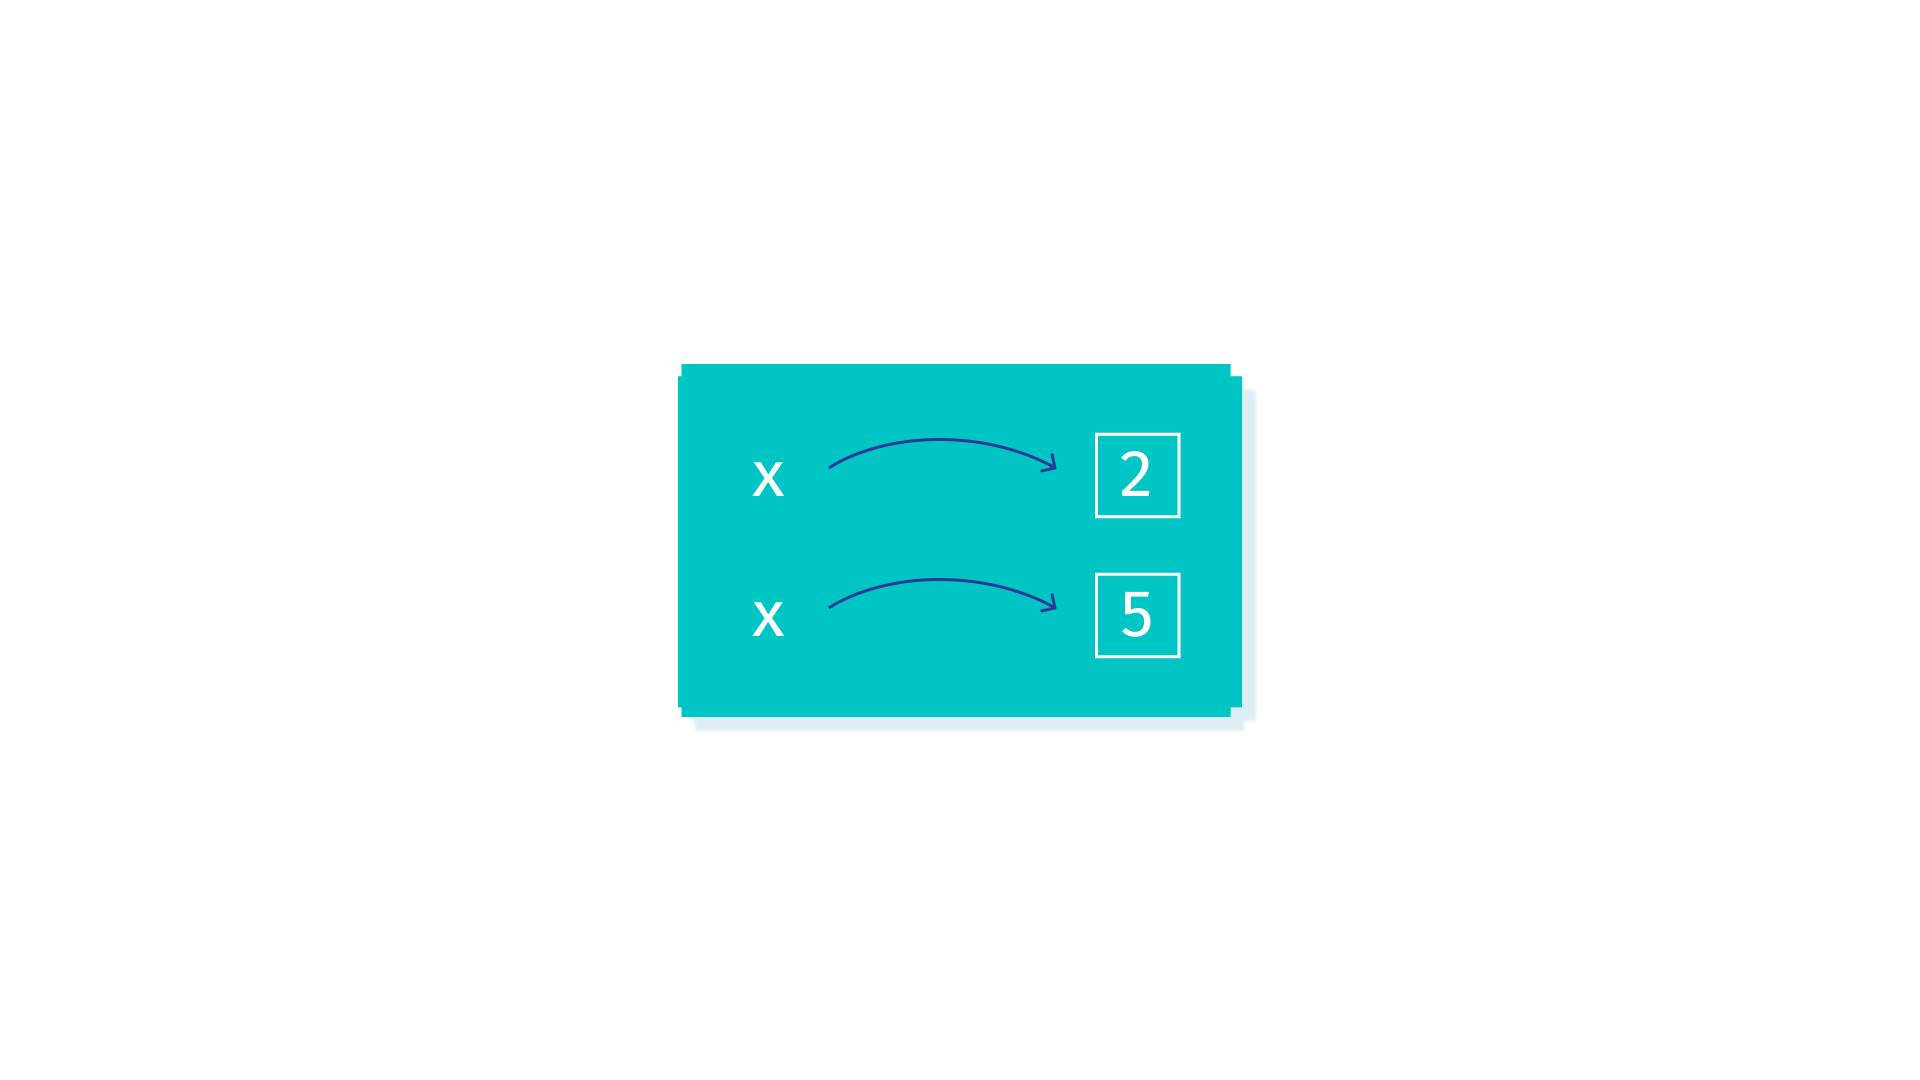

## Обмен переменных значениями

Классический обмен переменных значениями:

In [ ]:
a = 2
b = 5
print(a, b)
# -------
tmp = a
a = b
b = tmp
# -------
print(a, b)

2 5
5 2


Представьте, что вам нужно поменять 2 кусочка торта местами. Для этого вам понадобится третья тарелка.

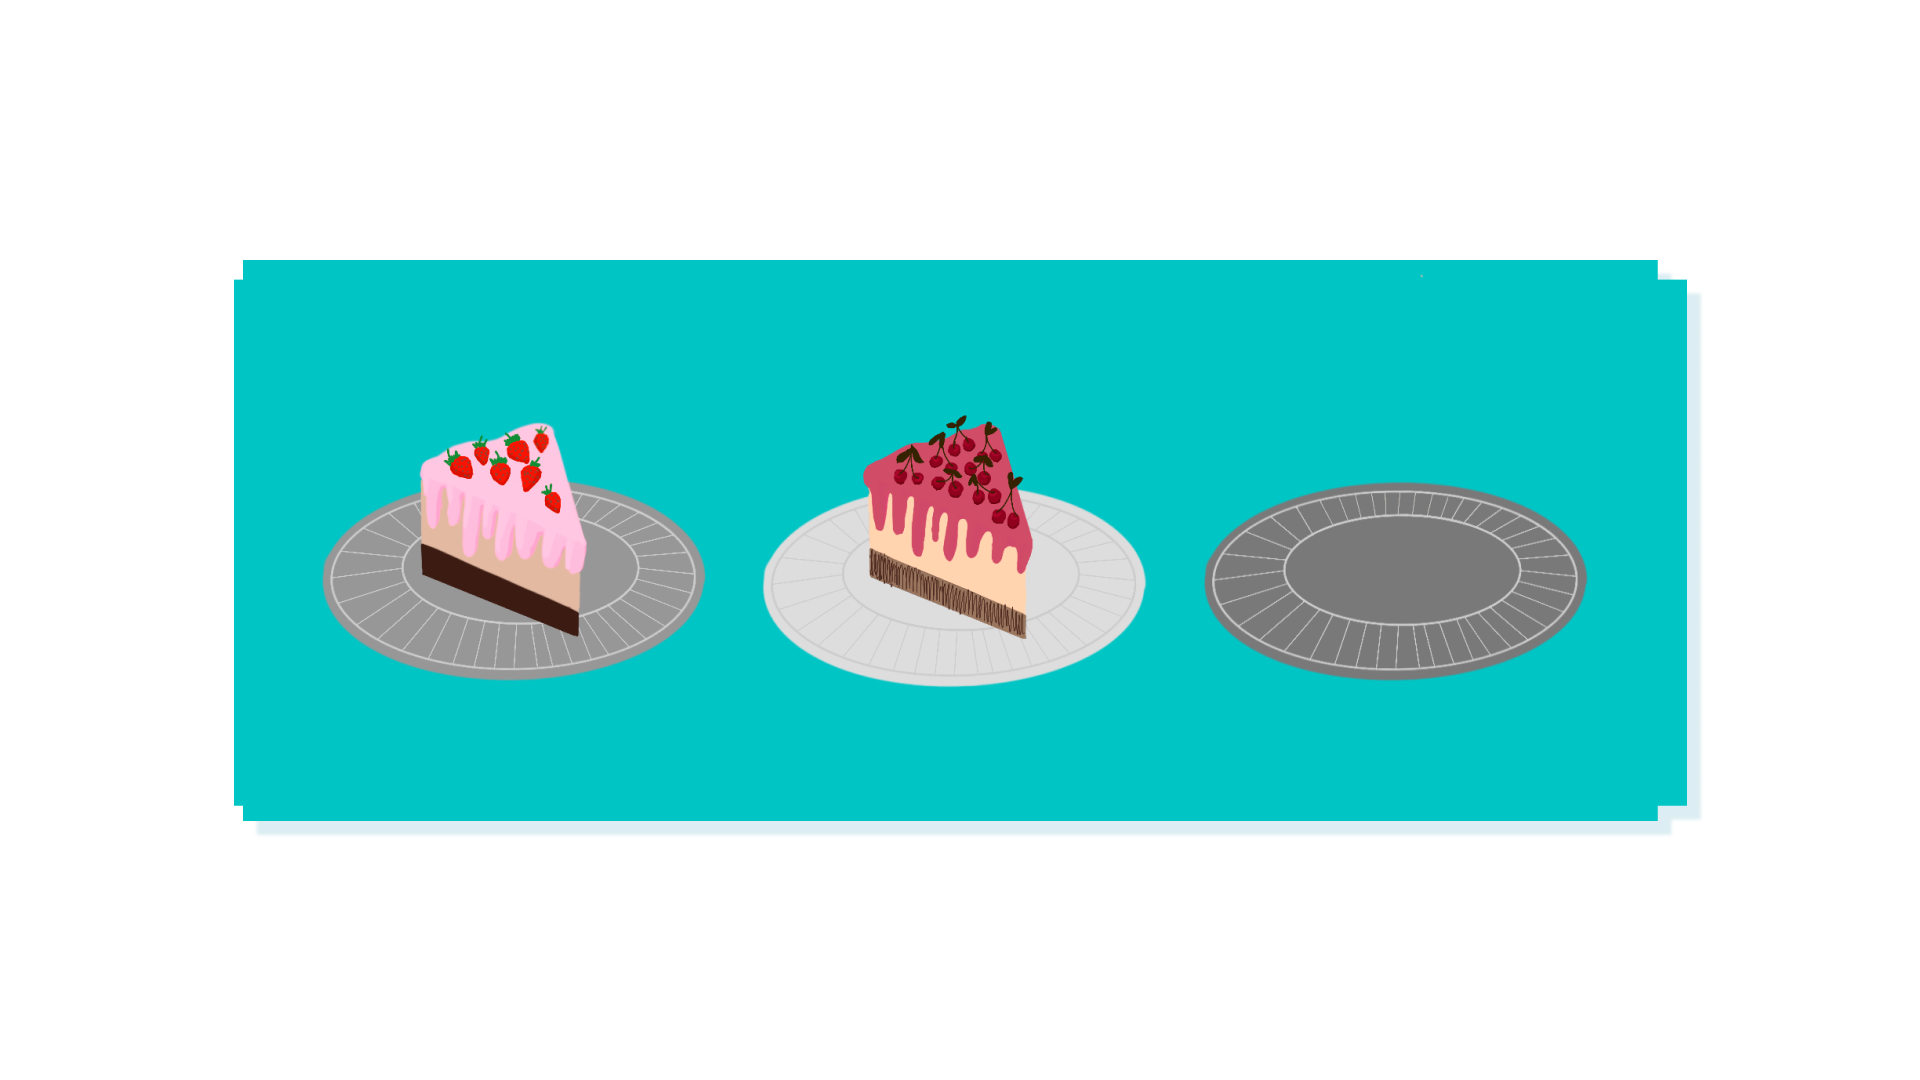

Через две дополнительные переменные:

In [ ]:
a = 2
b = 5
print(a, b)
# -------a
tmp1 = b
tmp2 = a
a = tmp1
b = tmp2
# -------
print(a, b)

2 5
5 2


Если продолжать аналогию.

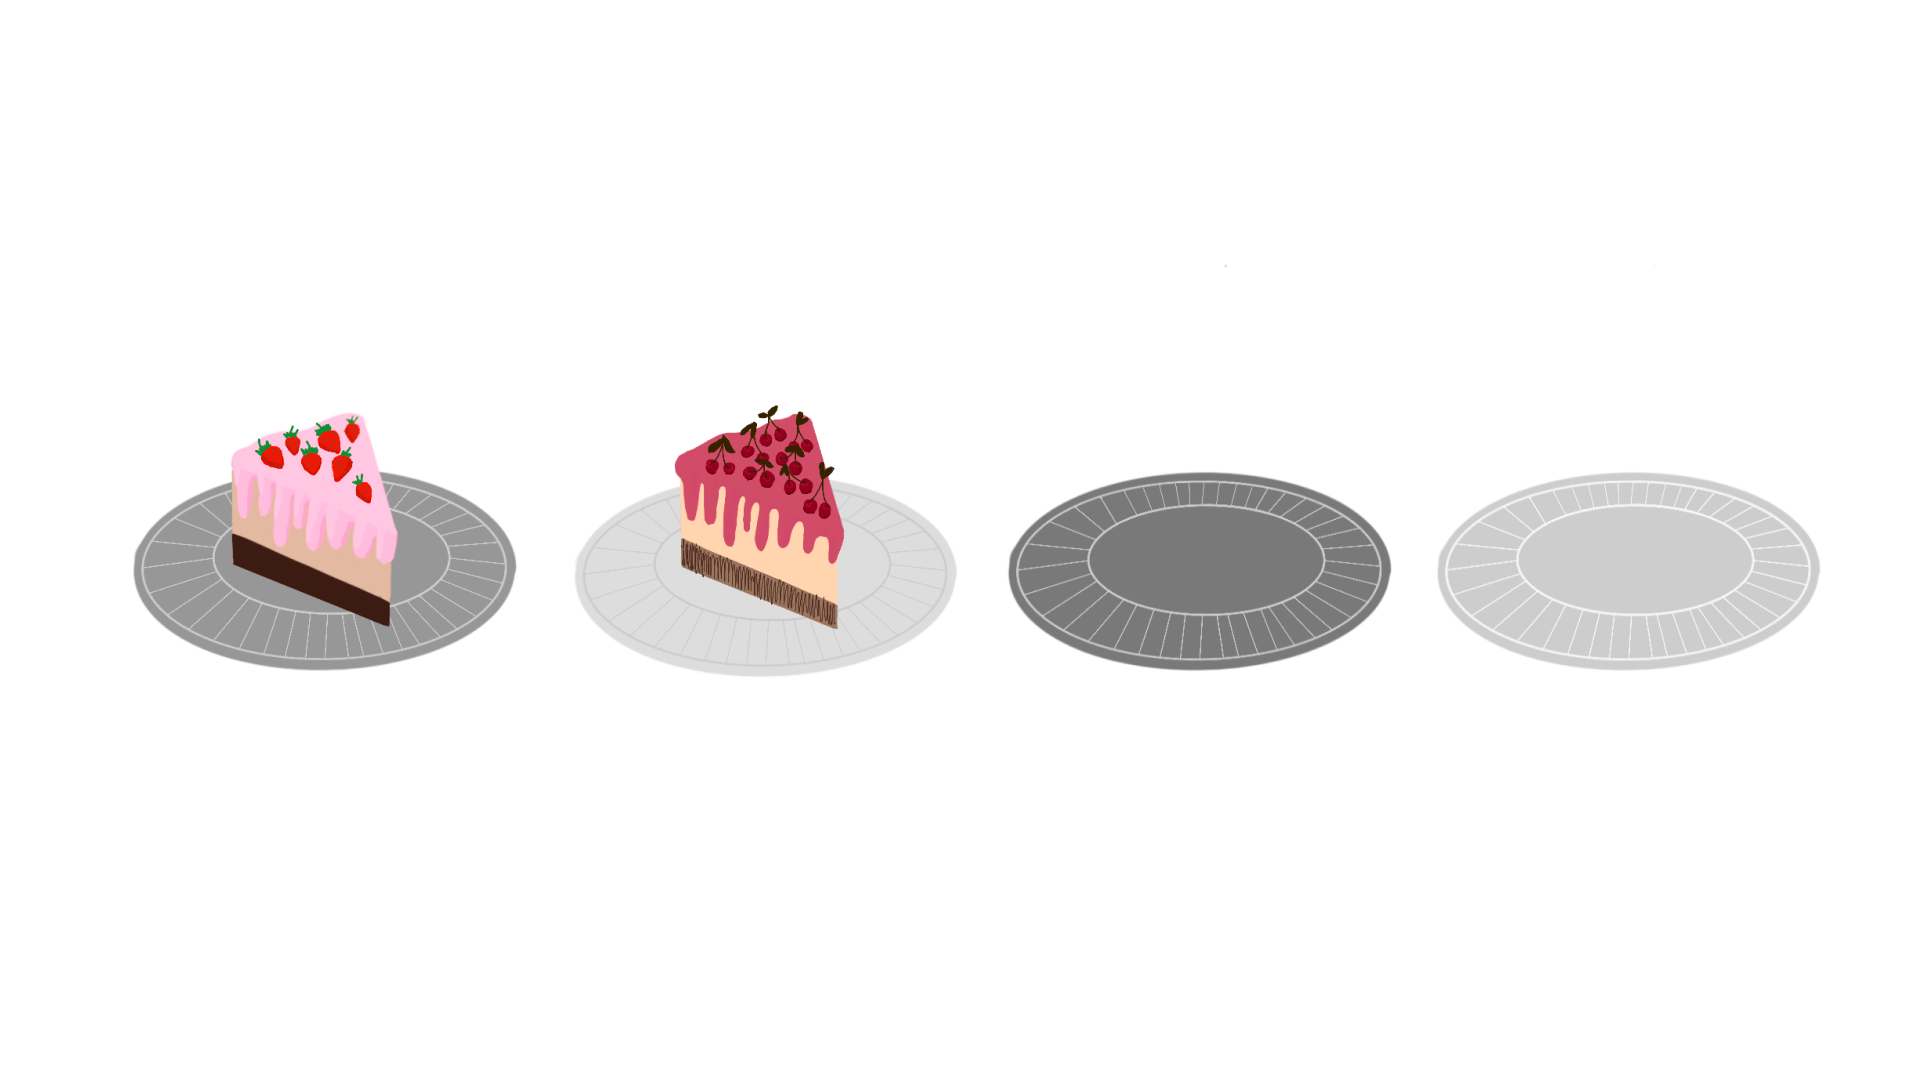

Эти четыре присваивания могут быть сделаны двумя множественными присваиваниями:

In [ ]:
a = 2
b = 5
print(a, b)
# -------
tmp1, tmp2 = b, a
a, b = tmp1, tmp2
# -------
print(a, b)

2 5
5 2


Ну и, наконец, подлинный Pythonic way:

In [ ]:
a = 2
b = 5
print(a, b)
# -------
a, b = b, a
# -------
print(a, b)

2 5
5 2


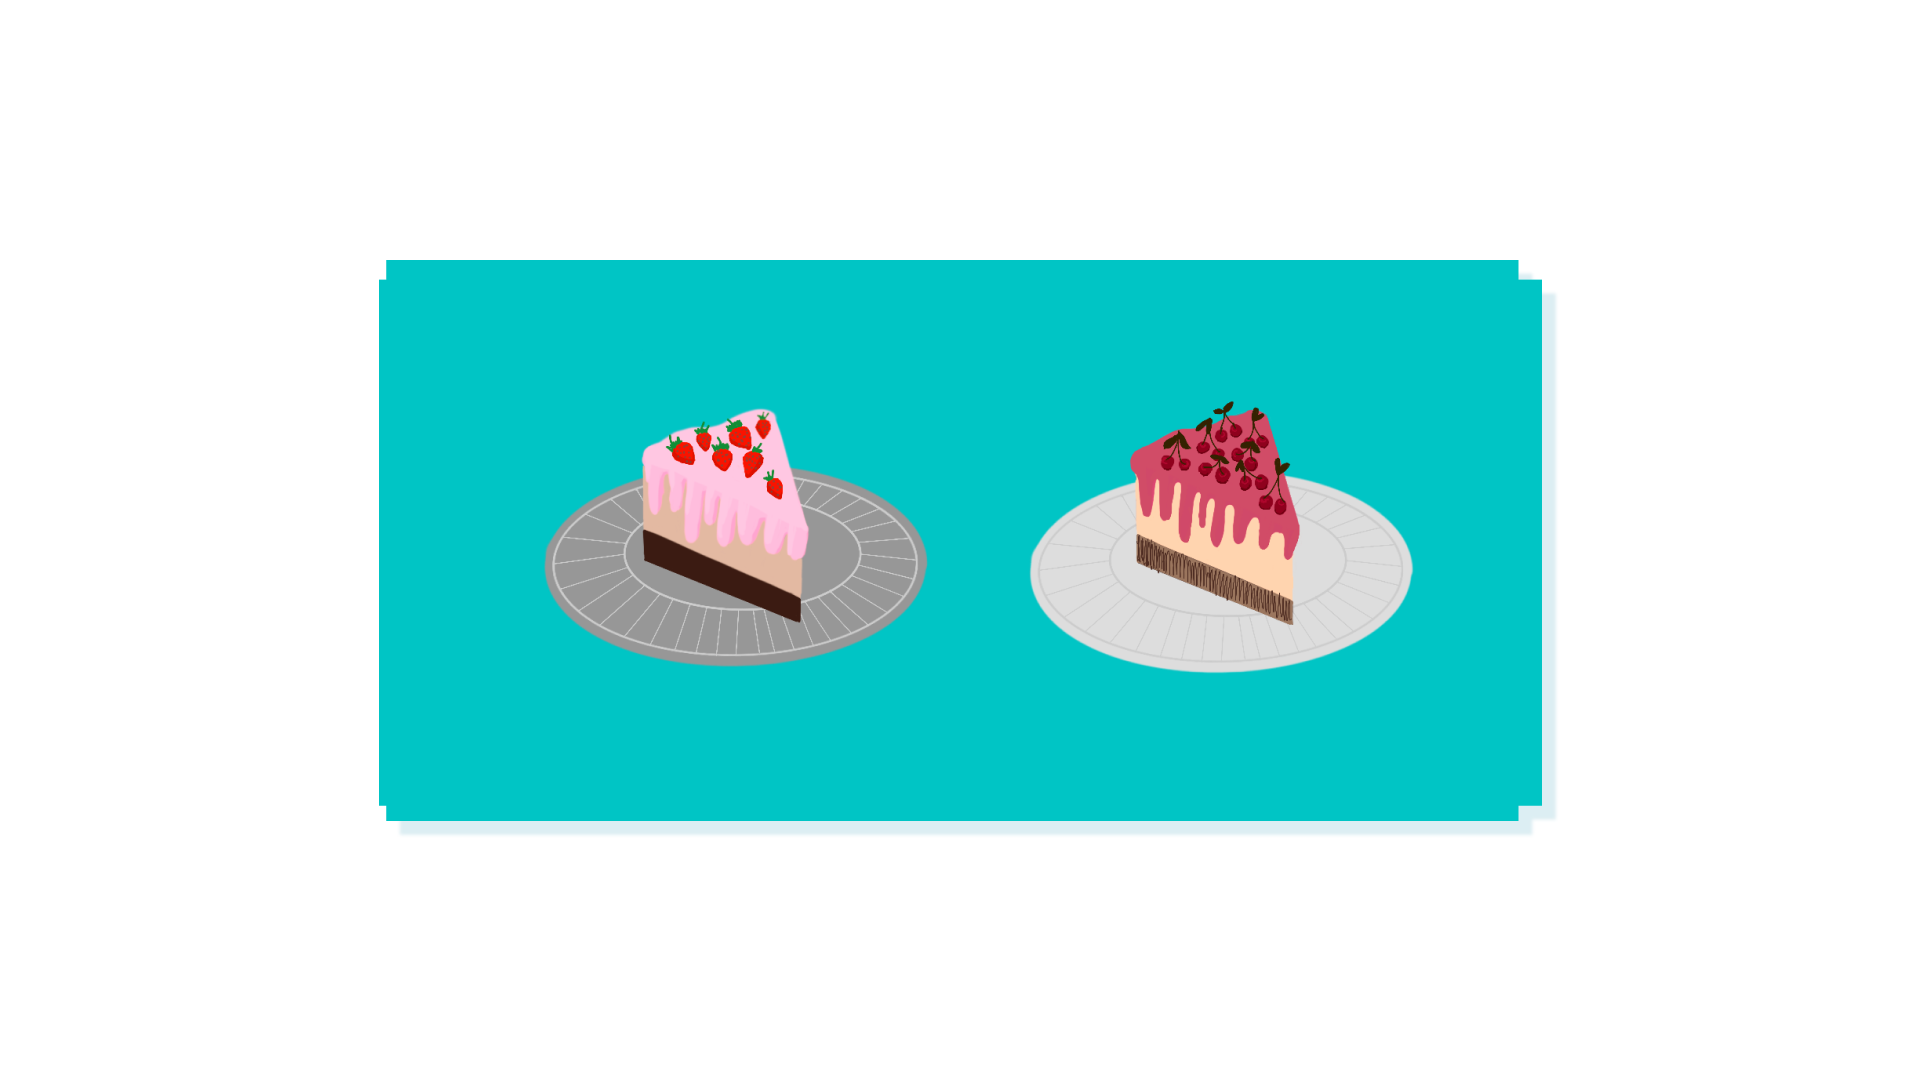

## Подсчёт ситуаций
Довольно часто значение переменной меняется по своему собственному старому значению.

Для пары подобных изменений есть свои названия. Увеличение на 1 — это *инкрементация*. Уменьшение на 1 — *декрементация*.

In [ ]:
x = y = 0
print(x, y)
x = x + 1
y = y - 1
print(x, y)

0 0
1 -1


Обратите внимание на выражение `x = x + 1`. Здесь икс в выражении справа ссылается на старый объект, который имеет старое значение. Затем вычисляется выражение, и появляется новый объект числа. Затем иксу присваивается (с именем `x` связывается) ссылка на новый объект.

In [ ]:
x += 1  # так красивее, понятнее и удобнее, а смысл тот же — инкрементация
y -= 1  # красивая декрементация
print(x)

2


Инкрементацию используют для подсчёта ситуаций. Сколько раз встретится такая строка: `x += 1`, тому и будет равно значение "переменной" `x`.

## Cуммирование чисел
Если нужно просуммировать некоторое количество чисел, то нужно создать переменную-аккумулятор, например, `s`, и в начале положить её равной нулю. После этого накапливаем туда сумму оператором `+=`:

In [ ]:
s = 0

x = 5
s += x

x = 2
s += x

x = 10
s += x

print(s)

17


 В цикле это делать удобнее:

In [ ]:
s = 0
for x in 5, 2, 10:
    s += x
print(s)

17


А ещё можно складывать числа, поступающие с клавиатуры:

In [ ]:
s = 0
for step in 1, 2, 3, 4, 5:
    s += int(input())
print(s)

10
20
30
40
50
150


Отлично! Однако указывать сколько раз вводятся числа с клавиатуры через запятую неудобно. Узнаем как для этого использовать `range` в следующем разделе.

# Цикл while и арифметические расчёты
Кроме цикла `for` есть цикл `while`. Он выполняет действия в теле цикла до тех пор, пока условие входа в цикл (оно написано в заголовке после слова while) не окажется ложным.

Типичный цикл while:

In [ ]:
x = 0
while x < 100:
    print(x)
    x += 10
print("действие после цикла")

0
10
20
30
40
50
60
70
80
90
действие после цикла


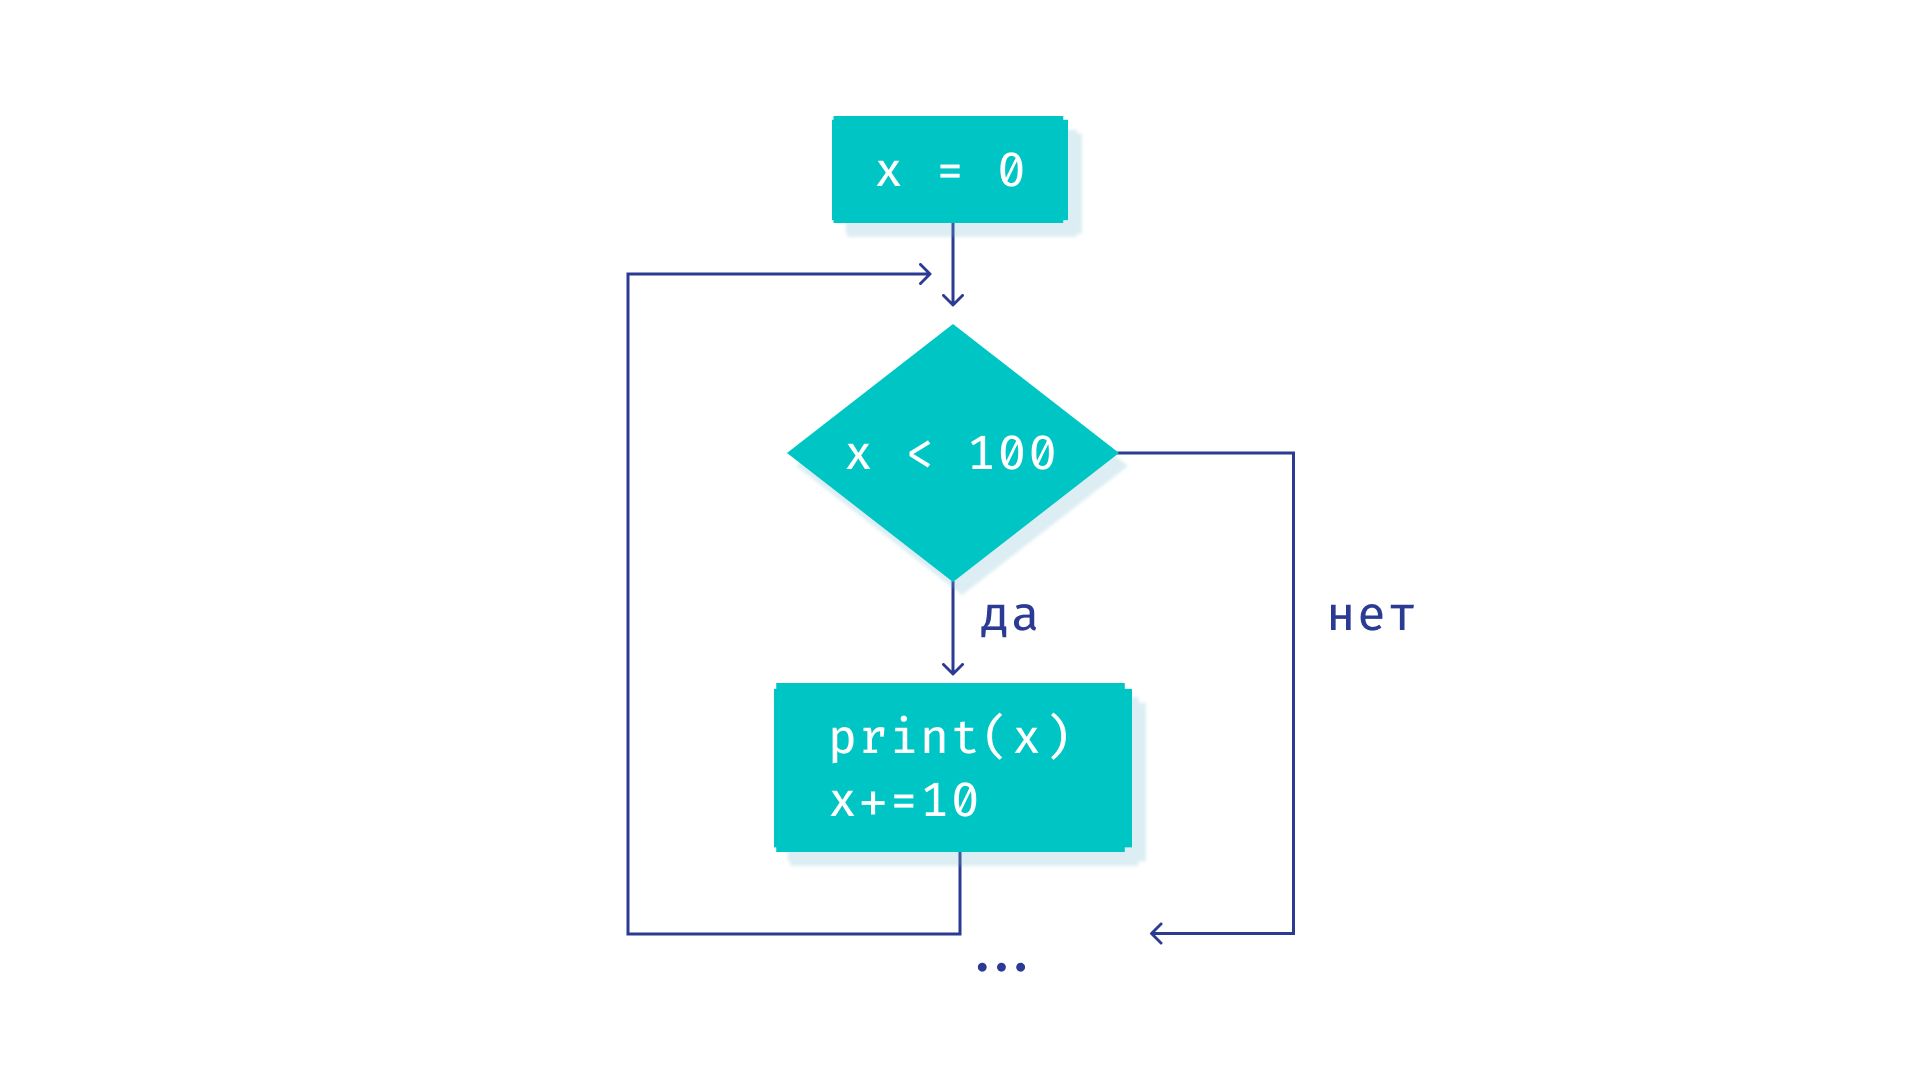

Иногда он может зациклиться навсегда (подумайте, прежде чем запускать):

In [ ]:
x = 1
while x > 0:
    print(x)
    x += 1
print("Никогда...")

Выходные данные были обрезаны до нескольких последних строк (5000).
91225
91226
91227
91228
91229
91230
91231
91232
91233
91234
91235
91236
91237
91238
91239
91240
91241
91242
91243
91244
91245
91246
91247
91248
91249
91250
91251
91252
91253
91254
91255
91256
91257
91258
91259
91260
91261
91262
91263
91264
91265
91266
91267
91268
91269
91270
91271
91272
91273
91274
91275
91276
91277
91278
91279
91280
91281
91282
91283
91284
91285
91286
91287
91288
91289
91290
91291
91292
91293
91294
91295
91296
91297
91298
91299
91300
91301
91302
91303
91304
91305
91306
91307
91308
91309
91310
91311
91312
91313
91314
91315
91316
91317
91318
91319
91320
91321
91322
91323
91324
91325
91326
91327
91328
91329
91330
91331
91332
91333
91334
91335
91336
91337
91338
91339
91340
91341
91342
91343
91344
91345
91346
91347
91348
91349
91350
91351
91352
91353
91354
91355
91356
91357
91358
91359
91360
91361
91362
91363
91364
91365
91366
91367
91368
91369
91370
91371
91372
91373
91374
91375
91376
91377
91378
91379
91

KeyboardInterrupt: ignored

Или не выполнить ни одной итерации, если условие сразу оказалось ложным:

In [ ]:
x = 0
while x > 0:
    print(x)
    x += 1

## Арифметическая прогрессия
Давайте сделаем арифметическую прогрессию:

In [ ]:
(start, stop, step) = (10, 50, 5)

x = start
while x < stop:
    print(x)
    x += step

10
15
20
25
30
35
40
45


Обратите внимание, что число stop не вошло в прогрессию. Это очень похоже на срезы строк и списков.

Поскольку генерация арифметической прогрессии — типичная задача, в Python есть готовый генератор прогрессий `range(start, stop, step)`, который работает по принципам экономных итерируемых объектов.

In [ ]:
for x in range(10, 50, 5):
    print(x)

10
15
20
25
30
35
40
45


In [ ]:
print(*range(0, 10))

0 1 2 3 4 5 6 7 8 9


In [ ]:
print(*range(9, -1, -1))  # наоборот

9 8 7 6 5 4 3 2 1 0


In [ ]:
print(*range(10))

0 1 2 3 4 5 6 7 8 9


## Геометрическая прогрессия
Зато мы можем теперь сделать геометрическую прогрессию:

In [ ]:
(start, stop, step) = (1, 100, 2)

x = start
while x < stop:
    print(x)
    x *= step

1
2
4
8
16
32
64


Обратите внимание на операцию `x *= step`. Это то же, что `x = x * step`. Так можно поступать и с другими арифметическими операциями.

# Ветвление хода исполнения программы
До сих пор наши программы представляли из себя *последовательности действий*, возможно с зацикливаниями.
В таких алгоритмах нет вариативности поведения, не хватает возможности выбора действий, то есть *ветвления*.

Самый простой вариант — это *действие, выполняемое условно*. Оно может произойти, а может и нет:

In [ ]:
x = int(input("Сколько вам лет? "))
if x < 0:
    print('Такого не может быть! Вы не можете родиться в будущем.')

Сколько вам лет? 16


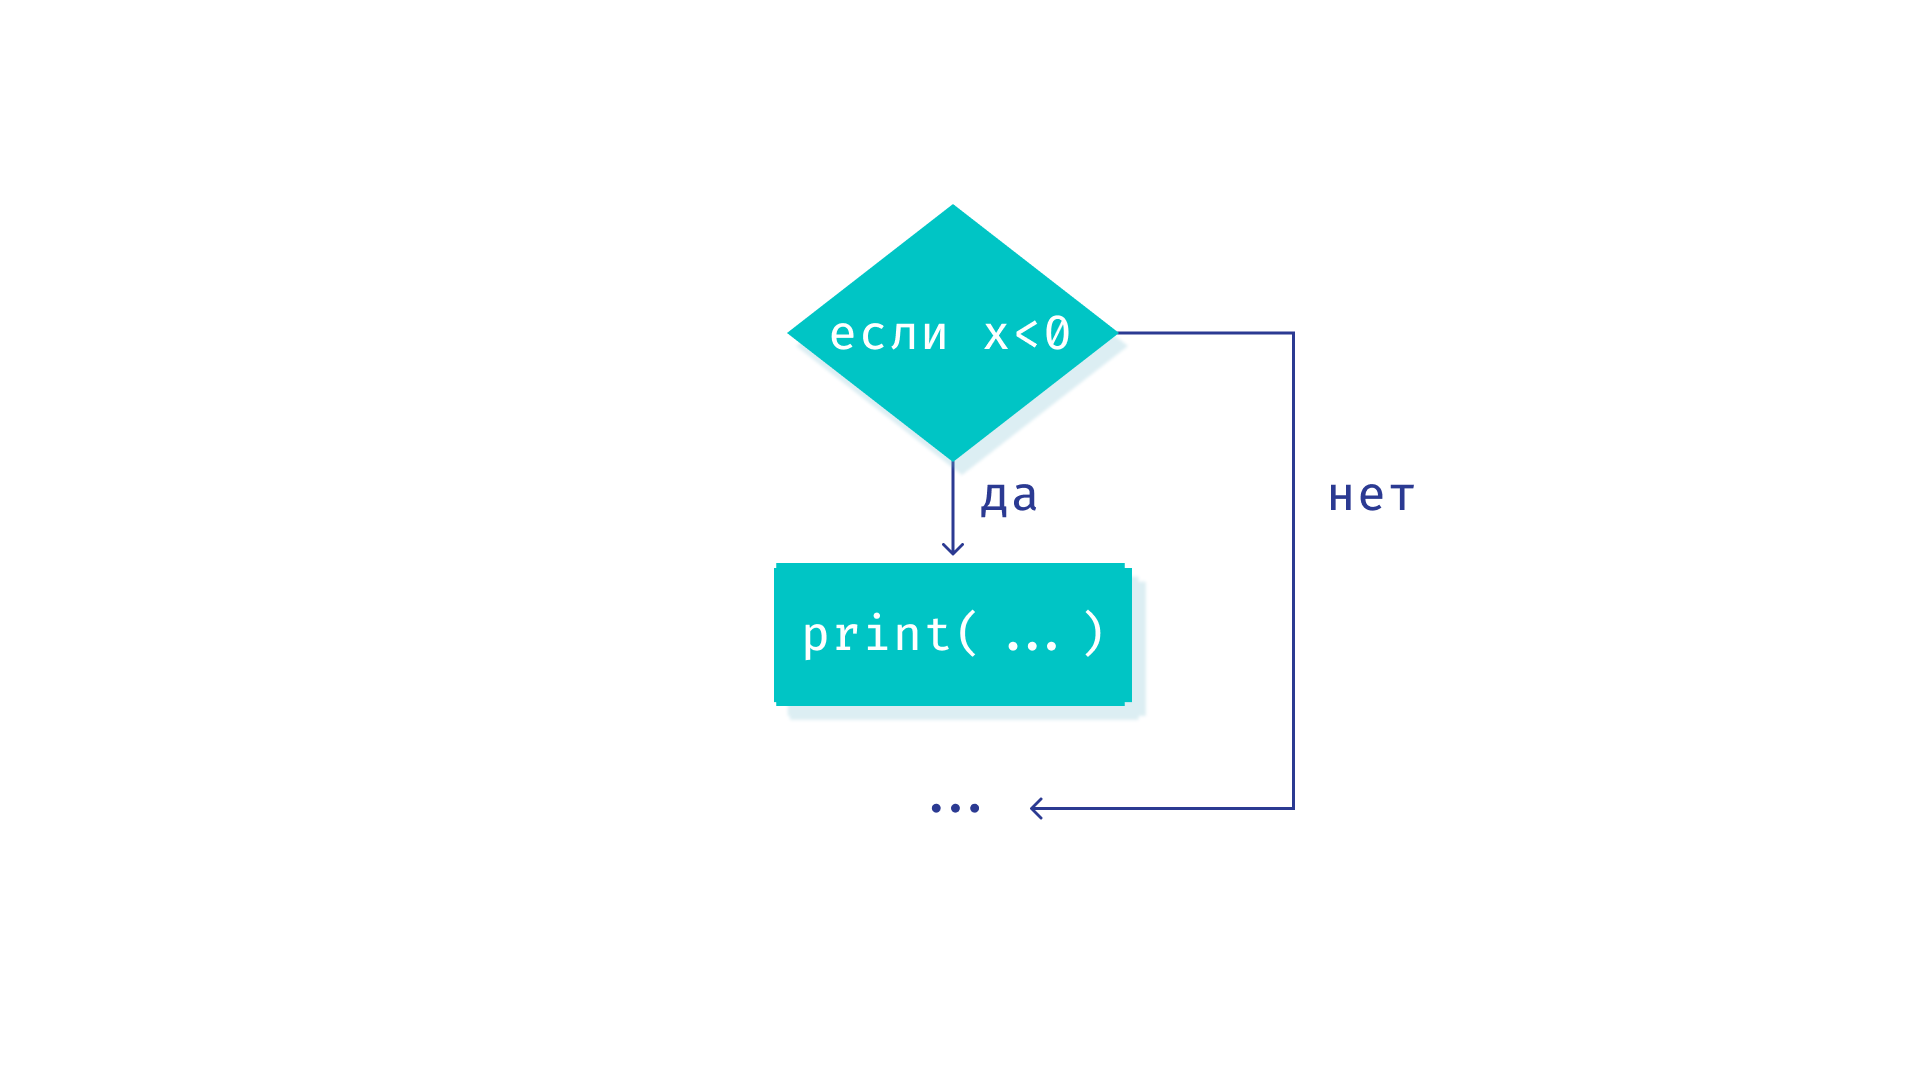

Второй вариант — это *ветвление с альтернативой*:

In [ ]:
x = int(input("Сколько вам лет? "))
if x < 18:
    print(f'Вам нельзя смотреть этот фильм! Приходите через {18-x} лет.')
else:
    print('Фильм загружается. Ждите...')

Сколько вам лет? 16
Вам нельзя смотреть этот фильм! Приходите через 2 лет.


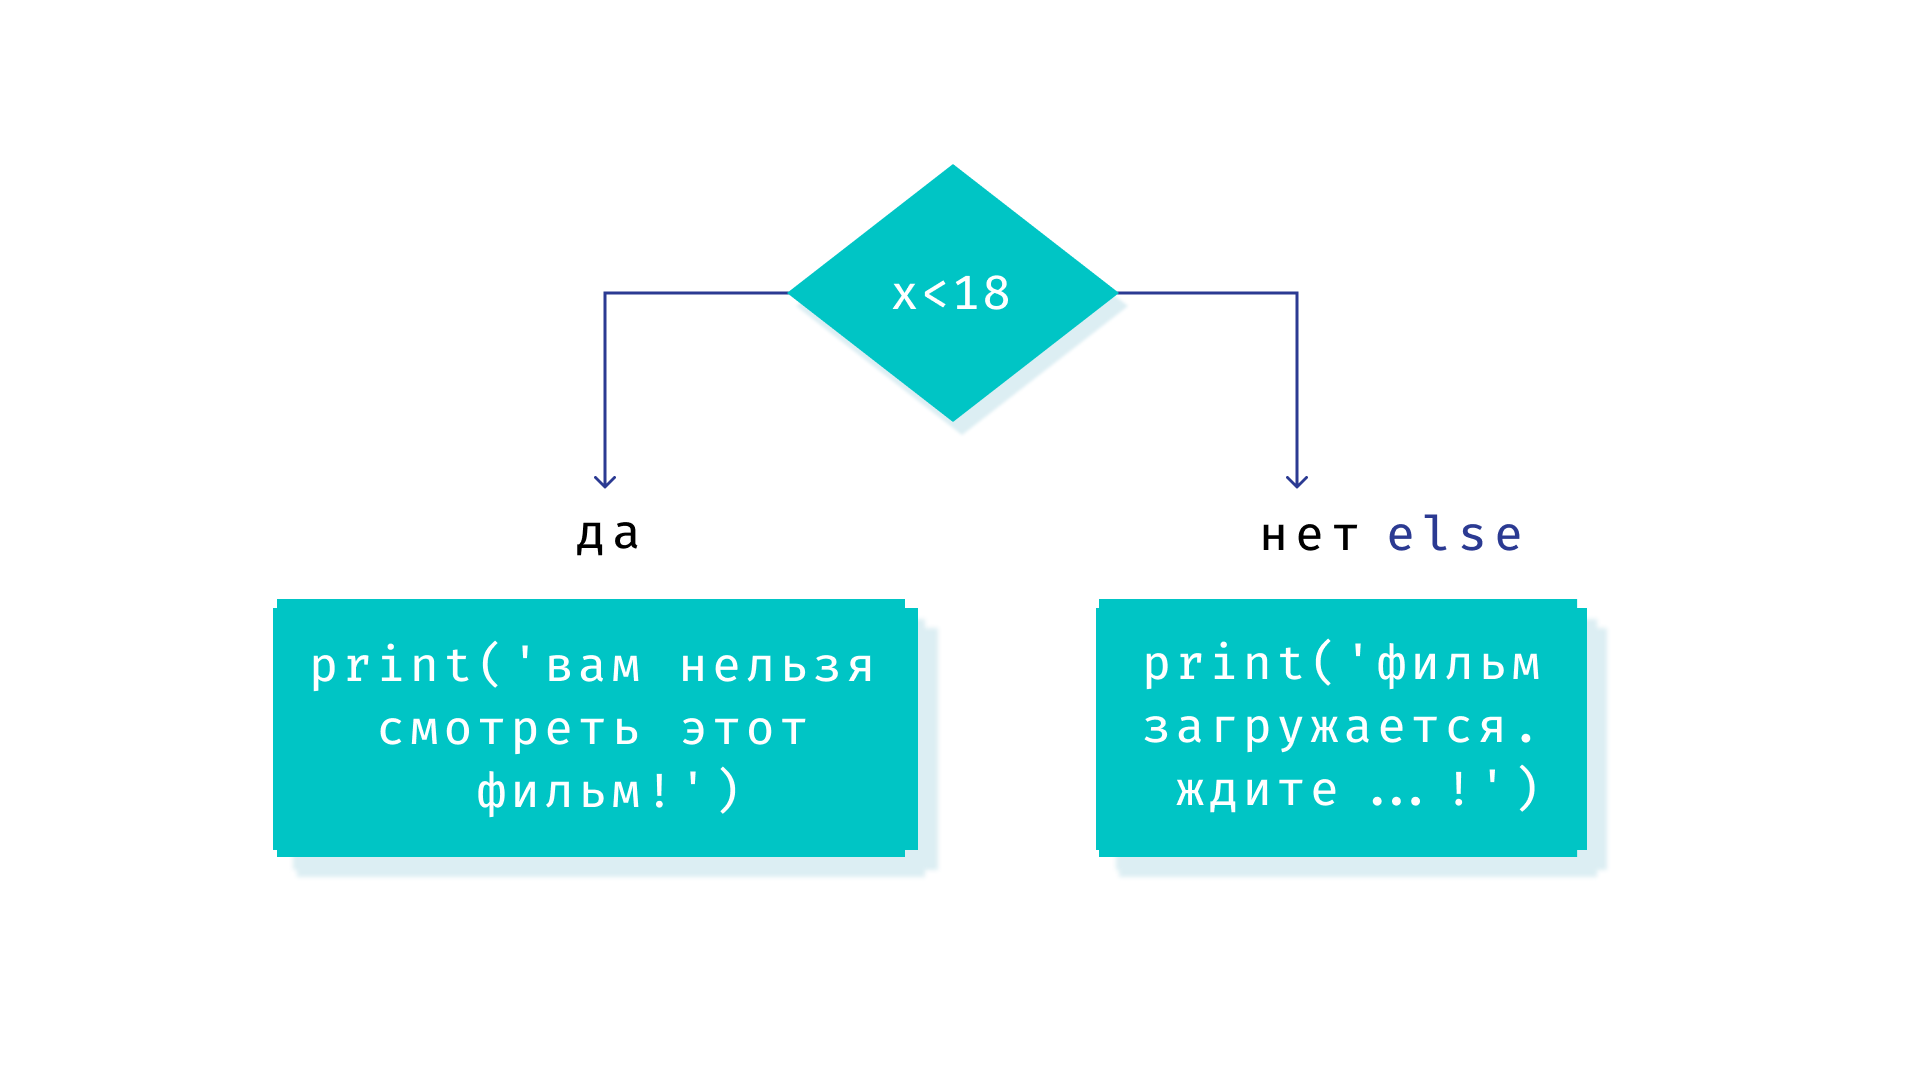

## Вложенные условные конструкции
Как и циклы, условные конструкции можно вкладывать друг в друга. Для этого дополнительно увеличивается отступ:

In [ ]:
x, y = input("Введите координаты точки на картезианской плоскости — два числа через пробел: ").split()
x, y = int(x), int(y)
if y > 0:
    if x > 0:
        print('Точка в I четверти.')
    else:
        print('Точка во II четверти.')
else:
    if x < 0:
        print('Точка в III четверти.')
    else:
        print('Точка в IV четверти.')

Введите координаты точки на картезианской плоскости — два числа через пробел: -3 -2
Точка в III четверти.


Замечательно! Из четырёх `print` будет всегда выбираться и срабатывать только один.

Но кое-что всё-таки не так с этой конструкцией. Мы предполагаем, что точка вообще находится в какой-то четверти, а она может быть и на осях. Поэкспериментируйте с точками (0, 0), (0, 10), (0, -10), (1, 0), (-1, 0). Сделайте вывод о том, нужно ли тестировать программное обеспечение.

## Каскадная конструкция if, elif, else
Реализуем тоже самое действие при помощи каскадного ветвления:

In [ ]:
x, y = input("Введите координаты точки на картезианской плоскости — два числа через пробел: ").split()
x, y = int(x), int(y)
if y > 0 and x > 0:
    print('Точка в I четверти.')
else:
    if y > 0 and x < 0:
        print('Точка во II четверти.')
    else:
        if y < 0 and x < 0:
            print('Точка в III четверти.')
        else:
            if y < 0 and x > 0:
                print('Точка в IV четверти.')
            else:
                print('Точка не в четвертях: на осях или в центре координат.')

Введите координаты точки на картезианской плоскости — два числа через пробел: -2 5
Точка во II четверти.


**NB!** Обратите внимание на логический оператор И = `and`. Ещё есть логическое ИЛИ = `or` и логическое НЕ = `not`. Их используют для составных условий в циклах while и ветвлениях.

Продолжим. Конструкция напоминает водопад, по которому мы скатываемся до тех пор, пока хотя бы какое-то условие не окажется истинным. Если же всё было ложно, мы "скатываемся" по последней альтернативе — последнему else.

Всё здесь хорошо, но отступы всё время увеличиваются. Чтобы избежать этого, в Python ввели *синтаксический сахар* — `elif`:

In [ ]:
x, y = input("Введите координаты точки на картезианской плоскости — два числа через пробел: ").split()
x, y = int(x), int(y)
if y > 0 and x > 0:
    print('Точка в I четверти.')
elif y > 0 and x < 0:
    print('Точка во II четверти.')
elif y < 0 and x < 0:
    print('Точка в III четверти.')
elif y < 0 and x > 0:
    print('Точка в IV четверти.')
else:
    print('Точка не в четвертях: на осях или в центре координат.')

Введите координаты точки на картезианской плоскости — два числа через пробел: 10 -1
Точка в IV четверти.


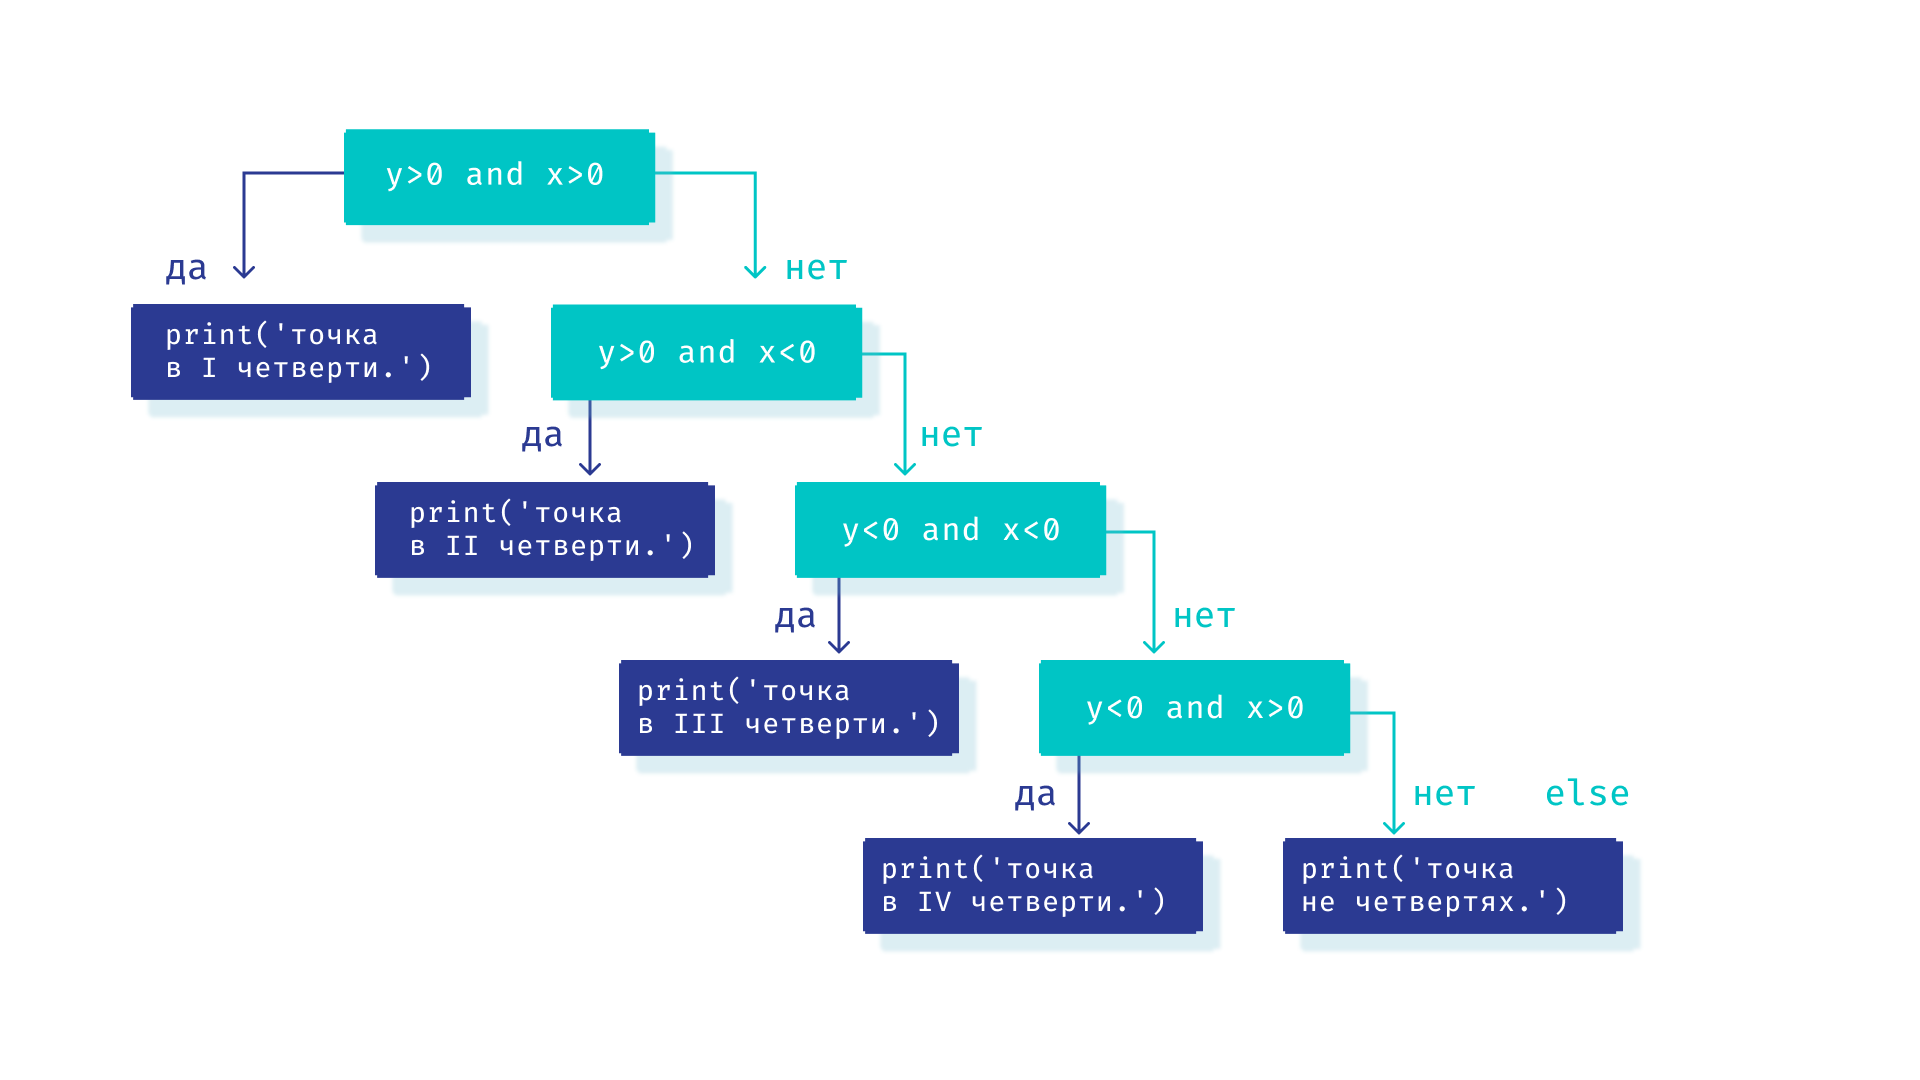

# Практическая задача на расчёт кредита

Если вы когда-нибудь брали кредит в банке, то вы могли сталкиваться с такой таблицей расчётов. В её ячейках показано, как с каждым месяцем убывает сумма оставшегося долга, какая сумма предстоит к выплате в каждый из месяцев, и какая часть этой суммы идёт на погашение основного долга, а какая на погашение набежавших процентов по кредиту.

Давайте осуществим расчёт таблицы долга по кредиту своими руками:

In [ ]:
loan_amount = float(input("Введите размер кредита (желаемая сумма денежных средств):"))

loan_rate = float(input("Введите процентную ставку по кредиту (процент годовых): "))
# Вычисляем месячный процент начислений, соответствующий указанному годовому:
monthly_deduction_rate = (1 + loan_rate/100) ** (1/12) - 1

monthly_loan_payment = float(input("Введите желаемый ежемесячный платёж: "))
if monthly_loan_payment < loan_amount * monthly_deduction_rate:
    print("Кредит не может быть выдан. Размер платежа должен погашать начисляемые % по кредиту.")
else:
    print("Кредит может быть выдан на следующих условиях:")
    remaining_debt = loan_amount
    loan_months = 0
    interest_charges = payment = debt_decrease = 0
    overall_loan_price = 0
    print()
    labels = ("month".rjust(8), "remaining debt".rjust(15), "charges".rjust(15),
              "debt decrease".rjust(15), "payment".rjust(15))
    print(*labels)  # Над таблицей выведем заголовки столбцов.
    print('-'*(8 + 15*4 + 4))  # И черту соответствующей длины.
    print(f"{loan_months:8} {remaining_debt:15.2f} {interest_charges:15.2f}",
          f"{debt_decrease:15.2f} {payment:15.2f}")  # Момент взятия кредита.
    while remaining_debt > 0.01:  # Пока долг больше одной копейки...
        loan_months += 1  # +1 месяц расчёта
        # Вычисляем размер начисленных процентов по кредиту:
        interest_charges = remaining_debt * monthly_deduction_rate
        # Вычисляем чему должен быть равен платёж в этом месяце:
        if monthly_loan_payment > remaining_debt + interest_charges:
            payment = remaining_debt + interest_charges
        else:
            payment = monthly_loan_payment
        # Вычисляем размер погашения основной суммы долга:
        debt_decrease = payment - interest_charges
        remaining_debt -= debt_decrease
        # Параллельно суммируем общий объём выплат по кредиту:
        overall_loan_price += payment
        # Выводим все рассчитанные значения в очередную строку таблицы:
        print(f"{loan_months:8} {remaining_debt:15.2f} {interest_charges:15.2f}",
              f"{debt_decrease:15.2f} {payment:15.2f}")
                
    print("Месяцев на погашение кредита:", loan_months)
    print("Полная стоимость кредита:", f"{overall_loan_price:0.2f}")

Введите размер кредита (желаемая сумма денежных средств):100000
Введите процентную ставку по кредиту (процент годовых): 15
Введите желаемый ежемесячный платёж: 30000
Кредит может быть выдан на следующих условиях:

   month  remaining debt         charges   debt decrease         payment
------------------------------------------------------------------------
       0       100000.00            0.00            0.00            0.00
       1        71171.49         1171.49        28828.51        30000.00
       2        42005.26          833.77        29166.23        30000.00
       3        12497.35          492.09        29507.91        30000.00
       4            0.00          146.41        12497.35        12643.75
Месяцев на погашение кредита: 4
Полная стоимость кредита: 102643.75


Результаты вычислений таблицы погашения кредита пришлось форматировать при помощи f-string, а также выравнивания `rjust`.
И всё равно смотреть на такую таблицу не очень удобно.

## Создание вручную файла CSV
Для работы с таблицами есть специальные *табличные процессоры*, такие как Excel или LibreOffice.org Calc. Как сделать данные удобными для этих редакторов? Один из самых простых и удобных форматов табличных данных — CSV.
Это расшифровывается как Comma Separated Values.

Если вы выполните код из ячейки ниже на своём локальном компьютере, у вас появится файл `test.csv` в той же директории, где вы запустили интерпретатор Python или Jupyter Notebook. Если вы запустите ячейку из Google Colab, то файл `test.csv` появится в меню слева. Его можно просмотреть в браузере или скачать, чтобы использовать локально.

In [ ]:
labels = "первый второй третий четвёртый".split()
data = [(1, 2, 3, 4),
        (10, 20, 30, 40),
        (100, 200, 300, 400)
       ]
with open('test.csv', 'w') as csv_file:
    print(','.join(labels), file=csv_file)
    for row in data:
        print(','.join(map(str, row)), file=csv_file)

Попробуйте найти файл и открыть его любым табличным процессором, например, Microsoft Excel или LibreOffice.org Calc.

Выше мы создали файл *.csv* для примера, а теперь создадим файл с данными таблицы расчёта кредита `loan_calculation.csv`:

In [ ]:
loan_amount = float(input("Введите размер кредита (желаемая сумма денежных средств):"))

loan_rate = float(input("Введите процентную ставку по кредиту (процент годовых): "))
monthly_deduction_rate = (1 + loan_rate/100) ** (1/12) - 1

monthly_loan_payment = float(input("Введите желаемый ежемесячный платёж: "))
if monthly_loan_payment < loan_amount * monthly_deduction_rate:
    print("Кредит не может быть выдан. Размер платежа должен погашать начисляемые % по кредиту.")
else:
    csv_filename = 'loan_calculation.csv'
    with open(csv_filename, 'w') as csv_file:
        remaining_debt = loan_amount
        loan_months = 0
        interest_charges = payment = debt_decrease = 0
        overall_loan_price = 0
        labels = ("month", "remaining debt", "charges",
                  "debt decrease", "payment")
        print(*labels, sep=', ', file=csv_file)
        print(f"{loan_months}, {remaining_debt:0.2f}, {interest_charges:0.2f}, " +
              f"{debt_decrease:0.2f}, {payment:0.2f}", file=csv_file)
        while remaining_debt > 0.01:
            loan_months += 1
            interest_charges = remaining_debt * monthly_deduction_rate
            if monthly_loan_payment > remaining_debt + interest_charges:
                payment = remaining_debt + interest_charges
            else:
                payment = monthly_loan_payment
            debt_decrease = payment - interest_charges
            remaining_debt -= debt_decrease
            overall_loan_price += payment

            print(f"{loan_months}, {remaining_debt:0.2f}, {interest_charges:0.2f}, " +
                  f"{debt_decrease:0.2f}, {payment:0.2f}", file=csv_file)
        print("Месяцев на погашение кредита:", loan_months, file=csv_file)
        print("Полная стимость кредита:", f"{overall_loan_price:0.2f}", file=csv_file)

    print("Кредит может быть выдан.")
    print("Месяцев на погашение кредита:", loan_months)
    print("Полная стоимость кредита:", f"{overall_loan_price:0.2f}")
    print("Таблица погашения в файле:", csv_filename)

Введите размер кредита (желаемая сумма денежных средств):1000
Введите процентную ставку по кредиту (процент годовых): 15
Введите желаемый ежемесячный платёж: 100
Кредит может быть выдан.
Месяцев на погашение кредита: 11
Полная стоимость кредита: 1069.93
Таблица погашения в файле: loan_calculation.csv
